# DATA VERSIONING USING DVC

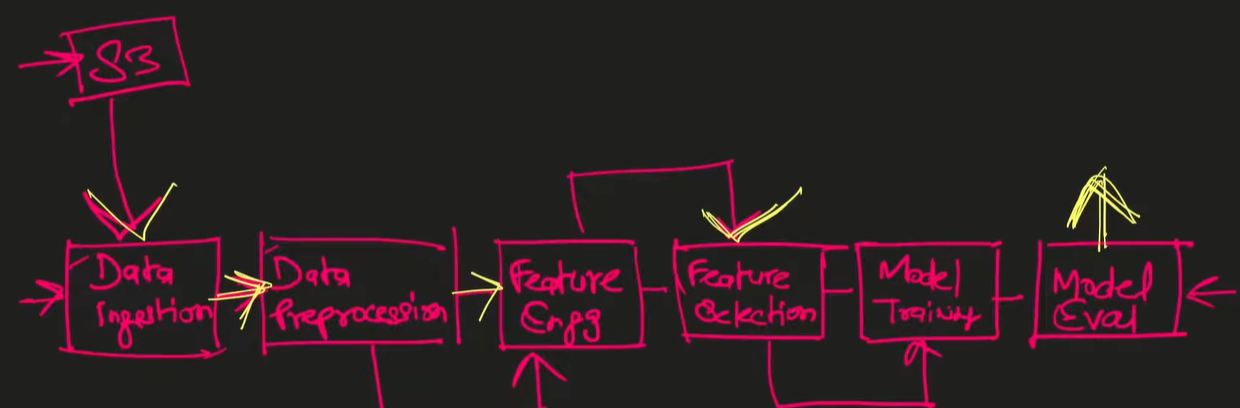

artifact means the output of each component

the output from a model eval module (a py file with class) is usually a json file, which is like a dictionary with key value pairs, where key is like precision,recall,f1-score,etc

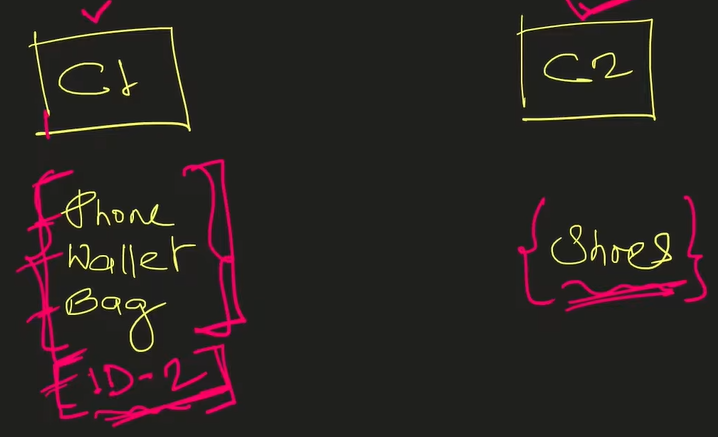

first, you keep the shoes in counter-2 you will then get a token, submit this token along with your bag,phone,wallet in your name in counter-1

When you wanna fetch it back, they will give you ur things back from counter-1 along with the token and submit this token back to counter-2 to get back ur shoes

Counter-1 : will keep phone, wallet and bag

Counter-2 : will keep shoes
But lets say we have to do this deposit for 20 different people, chances of getting it mixed up is high.

So counter-2 gives a token, let us say ID-1, take this token and deposit this token along with Phone,Wallet,Bag in counter-1.

While taking back your things from counter-1, they will give u back your things along with the token u submitted.

Since this token is a unique identifier, take this token to counter-2 to get back your shoes corresponding to that token.

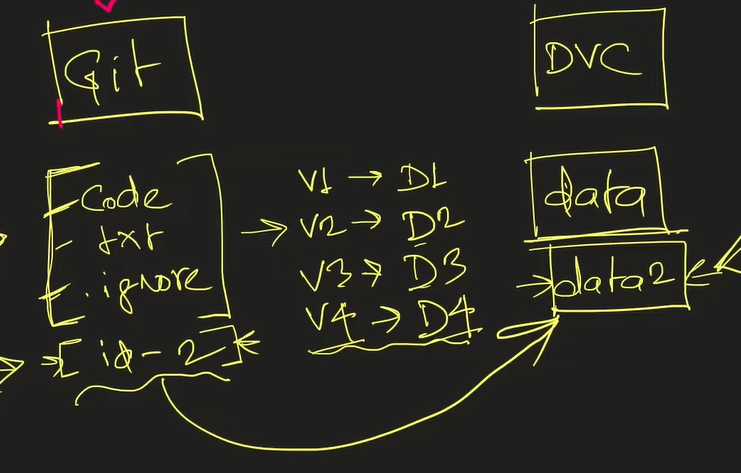



```
import pandas as pd
import os

# create a sample dataframe with column names
data = {
    'Name' : ['Alice','Bob','Charlie'],
    'Age' : [25,30,35],
    'City' : ['New York','Los Angeles','Chicago']
}

df = pd.DataFrame(data)

# ensure the "data" directory exists at the root level
data_dir = 'data'
os.makedirs(data_dir,exist_ok=True)

# define the file path
# joins from the root directory to the "data" folder and the desired file name
file_path = os.path.join(data_dir,'sample_data.csv')

# save the dataframe to a csv file, including column names
df.to_csv(file_path,index=False)

print(f"CSV file saved to {file_path}")

```



run this file: python mycode.py

git push origin main -> pushes from local repo to remote repo(origin) 's main branch

```
PS D:\MLOPS\MLOPS-DVC-Tool> python mycode.py
CSV file saved to data\sample_data.csv
PS D:\MLOPS\MLOPS-DVC-Tool> git add .
PS D:\MLOPS\MLOPS-DVC-Tool> git status
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        new file:   data/sample_data.csv
        new file:   projectflow.txt

PS D:\MLOPS\MLOPS-DVC-Tool> git commmit -m "first commit before DVC"
git: 'commmit' is not a git command. See 'git --help'.

The most similar command is
        commit
PS D:\MLOPS\MLOPS-DVC-Tool> git commit -m "first commit before DVC"
[main 8e62ee2] first commit before DVC
 3 files changed, 31 insertions(+)
 create mode 100644 data/sample_data.csv
 create mode 100644 mycode.py
 create mode 100644 projectflow.txt
PS D:\MLOPS\MLOPS-DVC-Tool> git push origin main
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 1.04 KiB | 355.00 KiB/s, done.
Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/curiouscurrent/MLOPS-DVC-Tool.git
   85bf0f5..8e62ee2  main -> main
   ```

```
PS D:\MLOPS\MLOPS-DVC-Tool> dvc init
Initialized DVC repository.

You can now commit the changes to git.
+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/treeverse/dvc>
PS D:\MLOPS\MLOPS-DVC-Tool> mkdir S3


    Directory: D:\MLOPS\MLOPS-DVC-Tool


Mode                 LastWriteTime         Length Name
----                 -------------         ------ ----
d-----         1/24/2026  12:40 AM                S3


PS D:\MLOPS\MLOPS-DVC-Tool> dvc remote add -d myremote S3
Setting 'myremote' as a default remote.
```

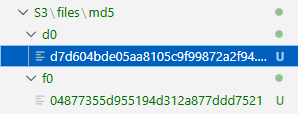

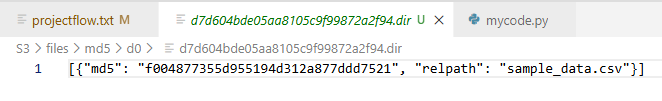

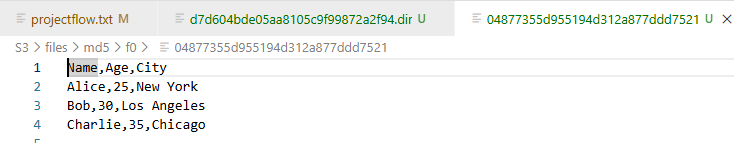

```
PS D:\MLOPS\MLOPS-DVC-Tool> dvc remote add -d myremote S3
Setting 'myremote' as a default remote.
PS D:\MLOPS\MLOPS-DVC-Tool> dvc add data/
Adding...
    You can remove it from Git, then add to DVC.
        To stop tracking from Git:
            git rm -r --cached 'data'
            git commit -m "stop tracking data"
PS D:\MLOPS\MLOPS-DVC-Tool> git rm -r --cached 'data'
rm 'data/sample_data.csv'
PS D:\MLOPS\MLOPS-DVC-Tool> git commit -m "stop tracking data
[main 967ef85] stop tracking data
 4 files changed, 6 insertions(+), 4 deletions(-)
100% Adding...|███████████████████████████████████████████████████████████████████████████████████████████████████|1/1 [00:00,  5.08file/s]

To track the changes with git, run:

        git add data.dvc .gitignore

To enable auto staging, run:

        dvc config core.autostage true
PS D:\MLOPS\MLOPS-DVC-Tool>

                            git add .
PS D:\MLOPS\MLOPS-DVC-Tool> git status
On branch main
  (use "git push" to publish your local commits)

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        modified:   .dvc/config
        modified:   .gitignore
        new file:   data.dvc
        modified:   projectflow.txt

[main 8667fe8] DVC initiated with data version 1
 create mode 100644 data.dvc
PS D:\MLOPS\MLOPS-DVC-Tool> git push origin main
Enumerating objects: 16, done.
Counting objects: 100% (16/16), done.
Writing objects: 100% (13/13), 1.91 KiB | 325.00 KiB/s, done.
Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 1 local object.
   8e62ee2..8667fe8  main -> main
PS D:\MLOPS\MLOPS-DVC-Tool> dvc status
Data and pipelines are up to date.
PS D:\MLOPS\MLOPS-DVC-Tool> git status
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
PS D:\MLOPS\MLOPS-DVC-Tool> dvc commit
PS D:\MLOPS\MLOPS-DVC-Tool> dvc push
Collecting                                                                                                       |2.00 [00:00, 56.7entry/s]
Pushing
2 files pushed
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
        modified:   projectflow.txt

Untracked files:
  (use "git add <file>..." to include in what will be committed)

no changes added to commit (use "git add" and/or "git commit -a")
PS D:\MLOPS\MLOPS-DVC-Tool> git add .
PS D:\MLOPS\MLOPS-DVC-Tool> git  status
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        new file:   S3/files/md5/d0/d7d604bde05aa8105c9f99872a2f94.dir
        new file:   S3/files/md5/f0/04877355d955194d312a877ddd7521
        modified:   projectflow.txt

PS D:\MLOPS\MLOPS-DVC-Tool> git commit -m "first version of data saved"
[main 1908f65] first version of data saved
 3 files changed, 7 insertions(+), 1 deletion(-)
 create mode 100644 S3/files/md5/d0/d7d604bde05aa8105c9f99872a2f94.dir
 create mode 100644 S3/files/md5/f0/04877355d955194d312a877ddd7521
PS D:\MLOPS\MLOPS-DVC-Tool> git push origin main
Enumerating objects: 12, done.
Counting objects: 100% (12/12), done.
Delta compression using up to 4 threads
Compressing objects: 100% (8/8), done.
Writing objects: 100% (10/10), 874 bytes | 218.00 KiB/s, done.
Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/curiouscurrent/MLOPS-DVC-Tool.git
   8667fe8..1908f65  main -> main
```

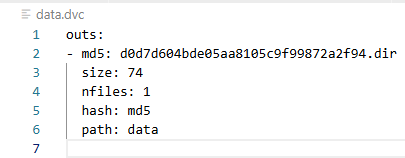

```
PS D:\MLOPS\MLOPS-DVC-Tool> python mycode.py
Traceback (most recent call last):
  File "D:\MLOPS\MLOPS-DVC-Tool\mycode.py", line 19, in <module>
PS D:\MLOPS\MLOPS-DVC-Tool> python mycode.py
CSV file saved to data\sample_data.csv
PS D:\MLOPS\MLOPS-DVC-Tool> dvc status
data.dvc:
        changed outs:
                modified:           data
PS D:\MLOPS\MLOPS-DVC-Tool> dvc commit
outputs ['data'] of stage: 'data.dvc' changed. Are you sure you want to commit it? [y/n] y
PS D:\MLOPS\MLOPS-DVC-Tool> dvc push
Collecting                                                                                                       |2.00 [00:00,  150entry/s]
Pushing
PS D:\MLOPS\MLOPS-DVC-Tool> git add .
PS D:\MLOPS\MLOPS-DVC-Tool> git status
On branch main
Your branch is up to date with 'origin/main'.
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        new file:   S3/files/md5/7c/b4a84aa66f1a2e87631c922baf6c9d
        new file:   S3/files/md5/cb/b1648bf4b7efe9463f79b174ae108c.dir
        modified:   data.dvc
        modified:   mycode.py
        modified:   projectflow.txt

PS D:\MLOPS\MLOPS-DVC-Tool> git commit -m "Second version of data saved"
[main c14018c] Second version of data saved
 5 files changed, 18 insertions(+), 2 deletions(-)
 create mode 100644 S3/files/md5/7c/b4a84aa66f1a2e87631c922baf6c9d
 create mode 100644 S3/files/md5/cb/b1648bf4b7efe9463f79b174ae108c.dir
PS D:\MLOPS\MLOPS-DVC-Tool> git push origin main
Enumerating objects: 19, done.
Counting objects: 100% (19/19), done.
Delta compression using up to 4 threads
Compressing objects: 100% (10/10), done.
Writing objects: 100% (12/12), 1.43 KiB | 365.00 KiB/s, done.
Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/curiouscurrent/MLOPS-DVC-Tool.git
   1908f65..c14018c  main -> main
```

```
PS D:\MLOPS\MLOPS-DVC-Tool> python mycode.py
CSV file saved to data\sample_data.csv
PS D:\MLOPS\MLOPS-DVC-Tool> dvc status
data.dvc:
        changed outs:
                modified:           data
PS D:\MLOPS\MLOPS-DVC-Tool> dvc commit
outputs ['data'] of stage: 'data.dvc' changed. Are you sure you want to commit it? [y/n] y
PS D:\MLOPS\MLOPS-DVC-Tool> dvc push
Collecting                                                                                                       |2.00 [00:00, 97.4entry/s]
Pushing
2 files pushed
PS D:\MLOPS\MLOPS-DVC-Tool> git status
On branch main
Your branch is up to date with 'origin/main'.
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
        modified:   data.dvc
        modified:   mycode.py
        modified:   projectflow.txt

Untracked files:
  (use "git add <file>..." to include in what will be committed)
        S3/files/md5/2a/
        S3/files/md5/56/

PS D:\MLOPS\MLOPS-DVC-Tool> git add .
PS D:\MLOPS\MLOPS-DVC-Tool> git status
On branch main
Your branch is up to date with 'origin/main'.
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        new file:   S3/files/md5/2a/ed30b37352c1a7210070576b1939ce
        new file:   S3/files/md5/56/33ef3681163fb7390a662f63762311.dir
        modified:   data.dvc
        modified:   mycode.py
        modified:   projectflow.txt

PS D:\MLOPS\MLOPS-DVC-Tool> git commit -m "Third version of data saved"
 5 files changed, 26 insertions(+), 4 deletions(-)
 create mode 100644 S3/files/md5/2a/ed30b37352c1a7210070576b1939ce
 create mode 100644 S3/files/md5/56/33ef3681163fb7390a662f63762311.dir
PS D:\MLOPS\MLOPS-DVC-Tool> git push origin main
Enumerating objects: 19, done.
Counting objects: 100% (19/19), done.
Delta compression using up to 4 threads
Compressing objects: 100% (10/10), done.
Writing objects: 100% (12/12), 1.51 KiB | 309.00 KiB/s, done.
Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/curiouscurrent/MLOPS-DVC-Tool.git
   c14018c..de6a669  main -> main
PS D:\MLOPS\MLOPS-DVC-Tool> git log --oneline
de6a669 (HEAD -> main, origin/main, origin/HEAD) Third version of data saved
c14018c Second version of data saved
1908f65 first version of data saved
8667fe8 DVC initiated with data version 1
967ef85 stop tracking data
8e62ee2 first commit before DVC
85bf0f5 Initial commit
```

```
PS D:\MLOPS\MLOPS-DVC-Tool> python mycode.py
CSV file saved to data\sample_data.csv
PS D:\MLOPS\MLOPS-DVC-Tool> dvc status
data.dvc:
        changed outs:
                modified:           data
PS D:\MLOPS\MLOPS-DVC-Tool> dvc commit
outputs ['data'] of stage: 'data.dvc' changed. Are you sure you want to commit it? [y/n] y
PS D:\MLOPS\MLOPS-DVC-Tool> dvc push
Collecting                                                                                                       |2.00 [00:00, 97.4entry/s]
Pushing
2 files pushed
PS D:\MLOPS\MLOPS-DVC-Tool> git status
On branch main
Your branch is up to date with 'origin/main'.
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
        modified:   data.dvc
        modified:   mycode.py
        modified:   projectflow.txt

Untracked files:
  (use "git add <file>..." to include in what will be committed)
        S3/files/md5/2a/
        S3/files/md5/56/

PS D:\MLOPS\MLOPS-DVC-Tool> git add .
PS D:\MLOPS\MLOPS-DVC-Tool> git status
On branch main
Your branch is up to date with 'origin/main'.
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        new file:   S3/files/md5/2a/ed30b37352c1a7210070576b1939ce
        new file:   S3/files/md5/56/33ef3681163fb7390a662f63762311.dir
        modified:   data.dvc
        modified:   mycode.py
        modified:   projectflow.txt

PS D:\MLOPS\MLOPS-DVC-Tool> git commit -m "Third version of data saved"
 5 files changed, 26 insertions(+), 4 deletions(-)
 create mode 100644 S3/files/md5/2a/ed30b37352c1a7210070576b1939ce
 create mode 100644 S3/files/md5/56/33ef3681163fb7390a662f63762311.dir
PS D:\MLOPS\MLOPS-DVC-Tool> git push origin main
Enumerating objects: 19, done.
Counting objects: 100% (19/19), done.
Delta compression using up to 4 threads
Writing objects: 100% (12/12), 1.51 KiB | 309.00 KiB/s, done.
Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/curiouscurrent/MLOPS-DVC-Tool.git
   c14018c..de6a669  main -> main
PS D:\MLOPS\MLOPS-DVC-Tool> git log --oneline
de6a669 (HEAD -> main, origin/main, origin/HEAD) Third version of data saved
c14018c Second version of data saved
1908f65 first version of data saved
8667fe8 DVC initiated with data version 1
967ef85 stop tracking data
8e62ee2 first commit before DVC
85bf0f5 Initial commit
PS D:\MLOPS\MLOPS-DVC-Tool> git checkout 1908f65
Note: switching to '1908f65'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>
Or undo this operation with:

  git switch -
Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 1908f65 first version of data saved
PS D:\MLOPS\MLOPS-DVC-Tool> git log --oneline
1908f65 (HEAD) first version of data saved
8667fe8 DVC initiated with data version 1
967ef85 stop tracking data
85bf0f5 Initial commit
PS D:\MLOPS\MLOPS-DVC-Tool> dvc status
        changed outs:
                modified:           data
PS D:\MLOPS\MLOPS-DVC-Tool> dvc pull
Collecting                                                                                                       |2.00 [00:00,  129entry/s]
Building workspace index                                                                                         |3.00 [00:00,  307entry/s]
Comparing indexes                                                                                                |3.00 [00:00,  472entry/s]
Applying changes                                                                                                 |1.00 [00:00,   120file/s]
M       data\
* (HEAD detached at 1908f65)
  main
PS D:\MLOPS\MLOPS-DVC-Tool> git checkout main
        projectflow.txt
Please commit your changes or stash them before you switch branches.
Aborting
PS D:\MLOPS\MLOPS-DVC-Tool> git checkout main
error: Your local changes to the following files would be overwritten by checkout:
        projectflow.txt
Please commit your changes or stash them before you switch branches.
PS D:\MLOPS\MLOPS-DVC-Tool> git restore projectflow.txt
PS D:\MLOPS\MLOPS-DVC-Tool> git checkout main
Previous HEAD position was 1908f65 first version of data saved
Your branch is up to date with 'origin/main'.
PS D:\MLOPS\MLOPS-DVC-Tool> git log --oneline
de6a669 (HEAD -> main, origin/main, origin/HEAD) Third version of data saved
c14018c Second version of data saved
1908f65 first version of data saved
8667fe8 DVC initiated with data version 1
967ef85 stop tracking data
85bf0f5 Initial commit
PS D:\MLOPS\MLOPS-DVC-Tool> dvc status
data.dvc:
        changed outs:
                modified:           data
PS D:\MLOPS\MLOPS-DVC-Tool> dvc pull
Collecting                                                                                                       |2.00 [00:00,  139entry/s]
Fetching
Building workspace index                                                                                         |3.00 [00:00,  330entry/s]
Comparing indexes                                                                                                |3.00 [00:00,  355entry/s]
Applying changes                                                                                                 |1.00 [00:00,   105file/s]
M       data\
1 file modified
PS D:\MLOPS\MLOPS-DVC-Tool> git log --oneline
de6a669 (HEAD -> main, origin/main, origin/HEAD) Third version of data saved
c14018c Second version of data saved
1908f65 first version of data saved
8667fe8 DVC initiated with data version 1
967ef85 stop tracking data
8e62ee2 first commit before DVC
85bf0f5 Initial commit
```